In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import joblib

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

### Reading in the Data

Preprocessing  here i will  proceed with the data cleaning. This will involve deciding what to do with null data - do I remove it or do i add a plcea holder value. This process is important because for any machine learning model, we need to have quality datain order to peroperly maximize the outcomes. 

Here, the main EDA will be carried out so I can better understand the data set and determine which features directly affect others and which would be useless during the training stage. This enires that the right data is fed into the model

In [3]:
data = pd.read_csv('fraudTrain.csv', sep=',')
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [6]:
data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [7]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

## Preprocessing 

In [8]:
data.isnull().values.any()

False

In [9]:
data['is_fraud'].unique()

array([0, 1], dtype=int64)

In [10]:
data[data['is_fraud'] == 1]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295399,1295399,2020-06-21 01:00:08,3524574586339330,fraud_Kassulke PLC,shopping_net,977.01,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,a83b093f0c1d9068fa0089f7c722615f,1371776408,26.888686,-80.834389,1
1295491,1295491,2020-06-21 01:53:35,3524574586339330,fraud_Schumm PLC,shopping_net,1210.91,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,f75b35bed13b9e692f170dba45a15b21,1371779615,28.216707,-79.855648,1
1295532,1295532,2020-06-21 02:16:56,4005676619255478,"fraud_Tillman, Dickinson and Labadie",gas_transport,10.24,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,1994-05-31,a0ba2472cd3fc9731f2a18d3f308f5c3,1371781016,29.700456,-91.361632,1
1295666,1295666,2020-06-21 03:26:20,3560725013359375,fraud_Corwin-Collins,gas_transport,21.69,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,daa281350b1e16093c7b4bf97bf4d6ed,1371785180,32.675272,-103.484949,1


In [11]:
data[data['is_fraud'] == 0]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [12]:
job_stats_df = data.groupby('job')['amt'].agg(['mean', 'std']).reset_index()
job_stats_df.to_csv("job_stats.csv", index=False)

## Checkpoint 1 

In [13]:
#Creating a new copy 
new_data = data.copy()

In [14]:
# adjusting the data and time setting 
new_data["trans_date_trans_time"] = pd.to_datetime(new_data["trans_date_trans_time"])
new_data["dob"] = pd.to_datetime(new_data["dob"])
new_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [15]:
# Here I dropped columns that are not useful for me
new_data = new_data.drop(columns=["first","last","gender","dob", "street", "city", "state", "zip", "trans_num"])

In [16]:
# Because i wantwed to create a metiric job spending avage 
job_avg_amt = new_data.groupby('job')['amt'].mean()

In [17]:
new_data['job_avg_amt'] = new_data['job'].map(job_avg_amt)

In [18]:
# creating new columns thats hows the deviation from job spending average 
new_data['amt_dev_from_job_avg'] = new_data['amt'] - new_data['job_avg_amt']

In [19]:
new_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,job_avg_amt,amt_dev_from_job_avg
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0,75.149219,-70.179219
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0,55.471906,51.758094
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0,69.622622,150.487378
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0,63.996233,-18.996233
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0,95.178091,-53.218091


In [20]:
# dropping rows that are empty / have missing values 
new_data.dropna().reset_index(drop=True)
new_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,job_avg_amt,amt_dev_from_job_avg
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0,75.149219,-70.179219
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0,55.471906,51.758094
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0,69.622622,150.487378
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0,63.996233,-18.996233
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0,95.178091,-53.218091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,37.7175,-112.4777,258,Geoscientist,1371816728,36.841266,-111.690765,0,63.941957,-48.381957
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,39.2667,-77.5101,100,"Production assistant, television",1371816739,38.906881,-78.246528,0,101.150621,-49.450621
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,32.9396,-105.8189,899,Naval architect,1371816752,33.619513,-105.130529,0,73.331682,32.598318
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,43.3526,-102.5411,1126,Volunteer coordinator,1371816816,42.788940,-103.241160,0,95.753691,-20.853691


# Exploratory Data Analysis 

As stated previously, here i am trying to understand the actual data as well as their relationships. Here I would be able tpo figure out if my data set is imbalanced or not, once i understand the type of data that I am working with then I can then decide what kind of features to add and then the best model that can be used.

Questions to ask:
Is it highly imbalanced - since it is a fraud detection data set, it would most likely be. If so, what is the ratio / percentage?
For the features in our data set, how correlated are they, is the relationship linear or non linear?
Given what has been explored, are there still questions that need to be asked?

In [21]:
# extracting the data and time separately
new_data['trans_date'] = new_data['trans_date_trans_time'].dt.date
new_data['trans_time'] = new_data['trans_date_trans_time'].dt.time
new_data['trans_hour'] = new_data['trans_date_trans_time'].dt.hour
new_data['trans_sec'] = new_data['trans_date_trans_time'].dt.hour * 3600 + \
                                  new_data['trans_date_trans_time'].dt.minute * 60 + \
                                  new_data['trans_date_trans_time'].dt.second


In [21]:
new_data[new_data['is_fraud'] == 1]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,job_avg_amt,amt_dev_from_job_avg,trans_date,trans_time,trans_hour,trans_sec
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,35.9946,-81.7266,885,Soil scientist,1325466397,36.430124,-81.179483,1,88.026468,193.033532,2019-01-02,01:06:37,1,3997
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,29.4400,-98.4590,1595797,Horticultural consultant,1325468849,29.819364,-99.142791,1,58.332045,-46.812045,2019-01-02,01:47:29,1,6449
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,29.4400,-98.4590,1595797,Horticultural consultant,1325473523,29.273085,-98.836360,1,58.332045,217.977955,2019-01-02,03:05:23,3,11123
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,35.9946,-81.7266,885,Soil scientist,1325475483,35.909292,-82.091010,1,88.026468,-80.996468,2019-01-02,03:38:03,3,13083
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,29.4400,-98.4590,1595797,Horticultural consultant,1325476547,29.786426,-98.683410,1,58.332045,217.397955,2019-01-02,03:55:47,3,14147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295399,1295399,2020-06-21 01:00:08,3524574586339330,fraud_Kassulke PLC,shopping_net,977.01,27.6330,-80.4031,105638,"Librarian, public",1371776408,26.888686,-80.834389,1,78.430026,898.579974,2020-06-21,01:00:08,1,3608
1295491,1295491,2020-06-21 01:53:35,3524574586339330,fraud_Schumm PLC,shopping_net,1210.91,27.6330,-80.4031,105638,"Librarian, public",1371779615,28.216707,-79.855648,1,78.430026,1132.479974,2020-06-21,01:53:35,1,6815
1295532,1295532,2020-06-21 02:16:56,4005676619255478,"fraud_Tillman, Dickinson and Labadie",gas_transport,10.24,30.4590,-90.9027,71335,Herbalist,1371781016,29.700456,-91.361632,1,67.132227,-56.892227,2020-06-21,02:16:56,2,8216
1295666,1295666,2020-06-21 03:26:20,3560725013359375,fraud_Corwin-Collins,gas_transport,21.69,31.8599,-102.7413,23,Cytogeneticist,1371785180,32.675272,-103.484949,1,65.688634,-43.998634,2020-06-21,03:26:20,3,12380


0    1289169
1       7506
Name: count, dtype: int64


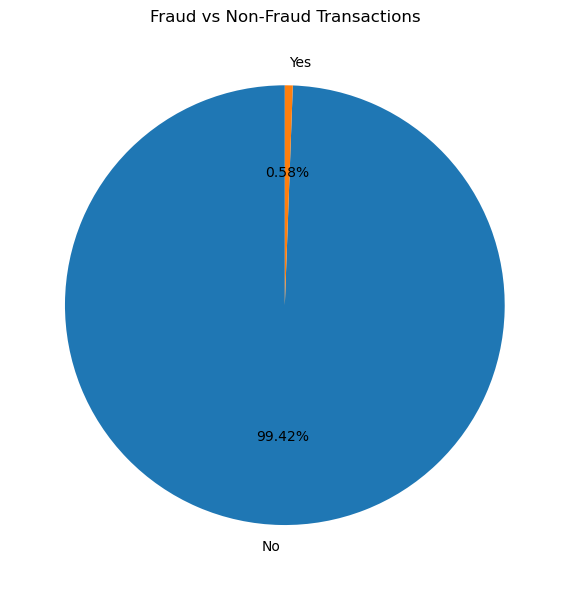

In [22]:
# Count the number of fraud and not fraud
# This helpoed me visualize the class imbalance 
fraud_count = new_data["is_fraud"].value_counts()

fraud_count = fraud_count.reset_index(drop=True)

print(fraud_count)

# Ensure fraud_count is sorted (0 = No, 1 = Yes)
fraud_count = fraud_count.sort_index()  # Sort to ensure correct order

# Create labels
labels = ["No", "Yes"]

# Plot the pie chart
plt.figure(figsize=(12,6))
plt.pie(fraud_count, labels=labels, autopct="%0.2f%%", startangle=90)
plt.title("Fraud vs Non-Fraud Transactions")
plt.tight_layout()
plt.show()
# Highly imbalanced data set

### Analysis by different fearures

#### Transaction amount distribution 

In [23]:
# More feature distributions
fraud = new_data[new_data["is_fraud"] == 1]
no_fraud = new_data[new_data["is_fraud"] == 0]

In [24]:
fraud.amt.describe()

count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64

In [25]:
no_fraud.amt.describe()

count    1.289169e+06
mean     6.766711e+01
std      1.540080e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.728000e+01
75%      8.254000e+01
max      2.894890e+04
Name: amt, dtype: float64

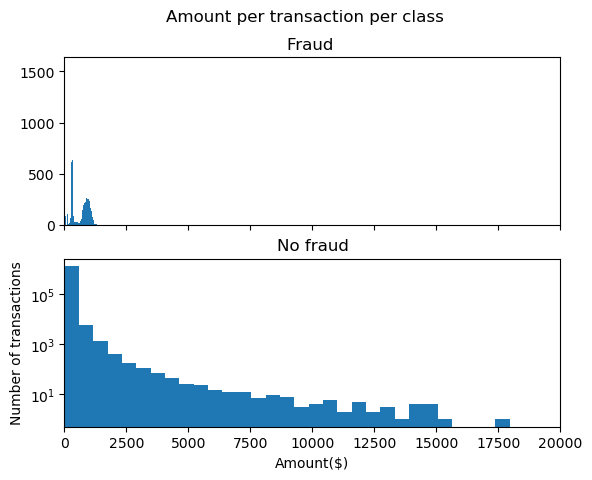

In [26]:
# Transaction amount distribution
fig, (ax1,ax2) = plt.subplots(2, 1, sharex = True) # creating a figure (fig) made up of 2 subplots that share same x axis
fig.suptitle("Amount per transaction per class")
bins = 50
ax1.hist(fraud.amt, bins = bins)
ax1.set_title("Fraud ")
ax2.hist(no_fraud.amt, bins= bins)
ax2.set_title("No fraud")
plt.xlabel("Amount($)")
plt.ylabel("Number of transactions")
plt.xlim(0,20000)
plt.yscale('log')#scale so we can see the range of values
plt.show()

#the fraud cases never reallyreach the 2500 dollar mark 
#it doesnt become to substancial but the little money adds up

#### Time patterns - Fraud by time 

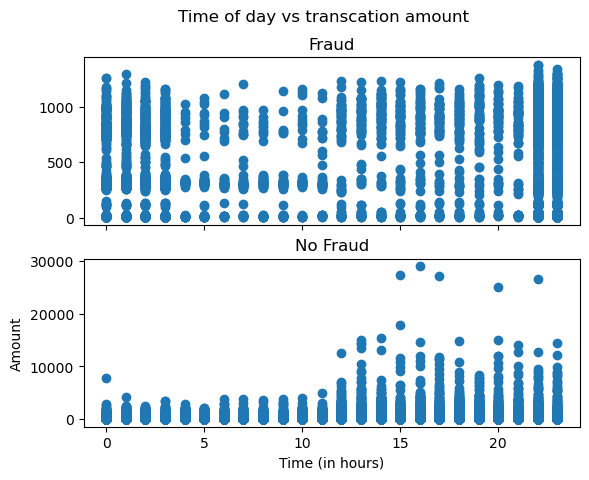

In [27]:
#Transcation pattern in hours 
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True)
fig.suptitle("Time of day vs transcation amount")
ax1.scatter(fraud.trans_hour, fraud.amt)
ax1.set_title("Fraud")
ax2.scatter(no_fraud.trans_hour, no_fraud.amt)
ax2.set_title("No Fraud")
plt.xlabel("Time (in hours)")
plt.ylabel("Amount")
plt.show()

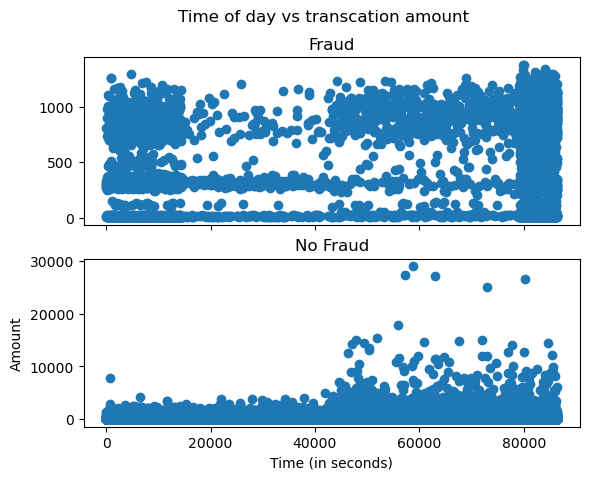

In [28]:
#Transcation pattern in seconds 
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True)
fig.suptitle("Time of day vs transcation amount")
ax1.scatter(fraud.trans_sec, fraud.amt)
ax1.set_title("Fraud")
ax2.scatter(no_fraud.trans_sec, no_fraud.amt)
ax2.set_title("No Fraud")
plt.xlabel("Time (in seconds)")
plt.ylabel("Amount")
plt.show()

#### Fraud by Category and geography

In [29]:
new_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'lat', 'long', 'city_pop', 'job', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'job_avg_amt', 'amt_dev_from_job_avg',
       'trans_date', 'trans_time', 'trans_hour', 'trans_sec'],
      dtype='object')

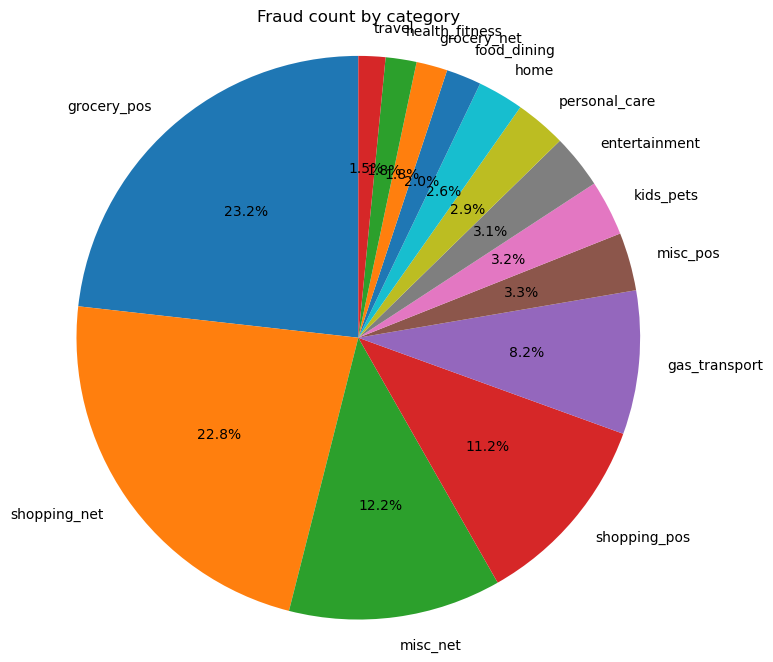

In [30]:
fraud_category = fraud['category'].value_counts()
plt.figure(figsize=(8,8))
plt.title("Fraud count by category")
plt.pie(fraud_category,
        labels = fraud_category.index, #category names as labels
        autopct="%0.1f%%", # 1 decimal place
        startangle=90)
plt.axis('equal')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


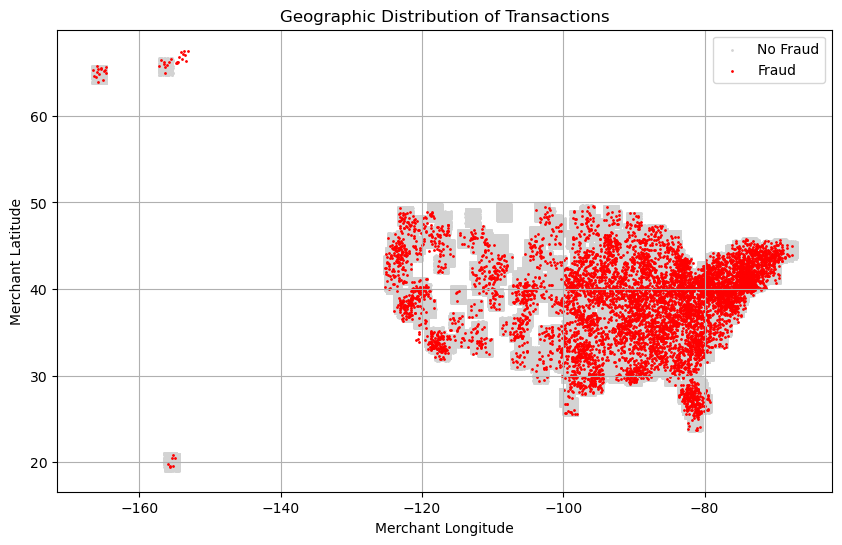

In [31]:
# Transaction amount distribution
plt.figure(figsize=(10,6))
plt.scatter(no_fraud['merch_long'], no_fraud['merch_lat'], s=1, c='lightgrey', label = "No Fraud")
plt.scatter(fraud['merch_long'], fraud['merch_lat'], s=1, c='red',label = "Fraud")
plt.xlabel("Merchant Longitude")
plt.ylabel("Merchant Latitude")
plt.title("Geographic Distribution of Transactions")
plt.legend()
plt.grid(True)
plt.show()

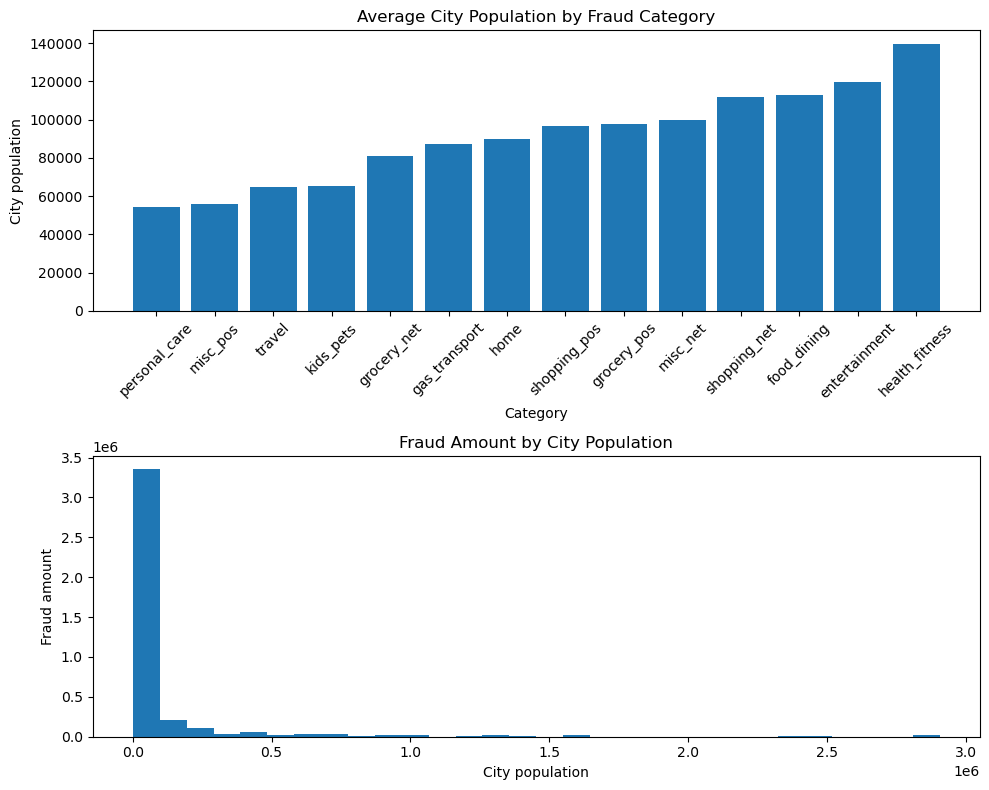

In [32]:
#population vs fraud
fig ,(ax1, ax2) = plt.subplots(2,1, figsize=(10,8))

fraud_cat_pop = fraud.groupby('category')['city_pop'].mean().sort_values()
ax1.bar(fraud_cat_pop.index ,fraud_cat_pop.values)
ax1.set_xlabel("Category")
ax1.set_ylabel("City population")

ax1.set_title("Average City Population by Fraud Category")
ax1.tick_params(axis='x', rotation=45)


ax2.hist(fraud['city_pop'], weights = fraud['amt'], bins = 30)
ax2.set_xlabel("City population")
ax2.set_ylabel("Fraud amount")

ax2.set_title("Fraud Amount by City Population")

plt.tight_layout()
plt.show()

In [33]:
# Taking a sample of the data 

sample = new_data.sample(frac = 0.1, random_state = 1) # taking 10 percent of my sample

sample.shape

(129668, 20)

In [34]:
new_data.shape

(1296675, 20)

In [35]:
samp_fraud = sample[sample['is_fraud'] == 1]
samp_valid = sample[sample['is_fraud'] == 0]

outlier_frac = len(samp_fraud)/ float(len(samp_valid))


In [36]:
print("Fraud Cases: {}".format(len(samp_fraud))) #Getting fraud cases from sample
print("Non Fraud Cases: {}".format(len(samp_valid))) #getting bvalid cases from sample
print(outlier_frac)

Fraud Cases: 705
Non Fraud Cases: 128963
0.005466684242767306


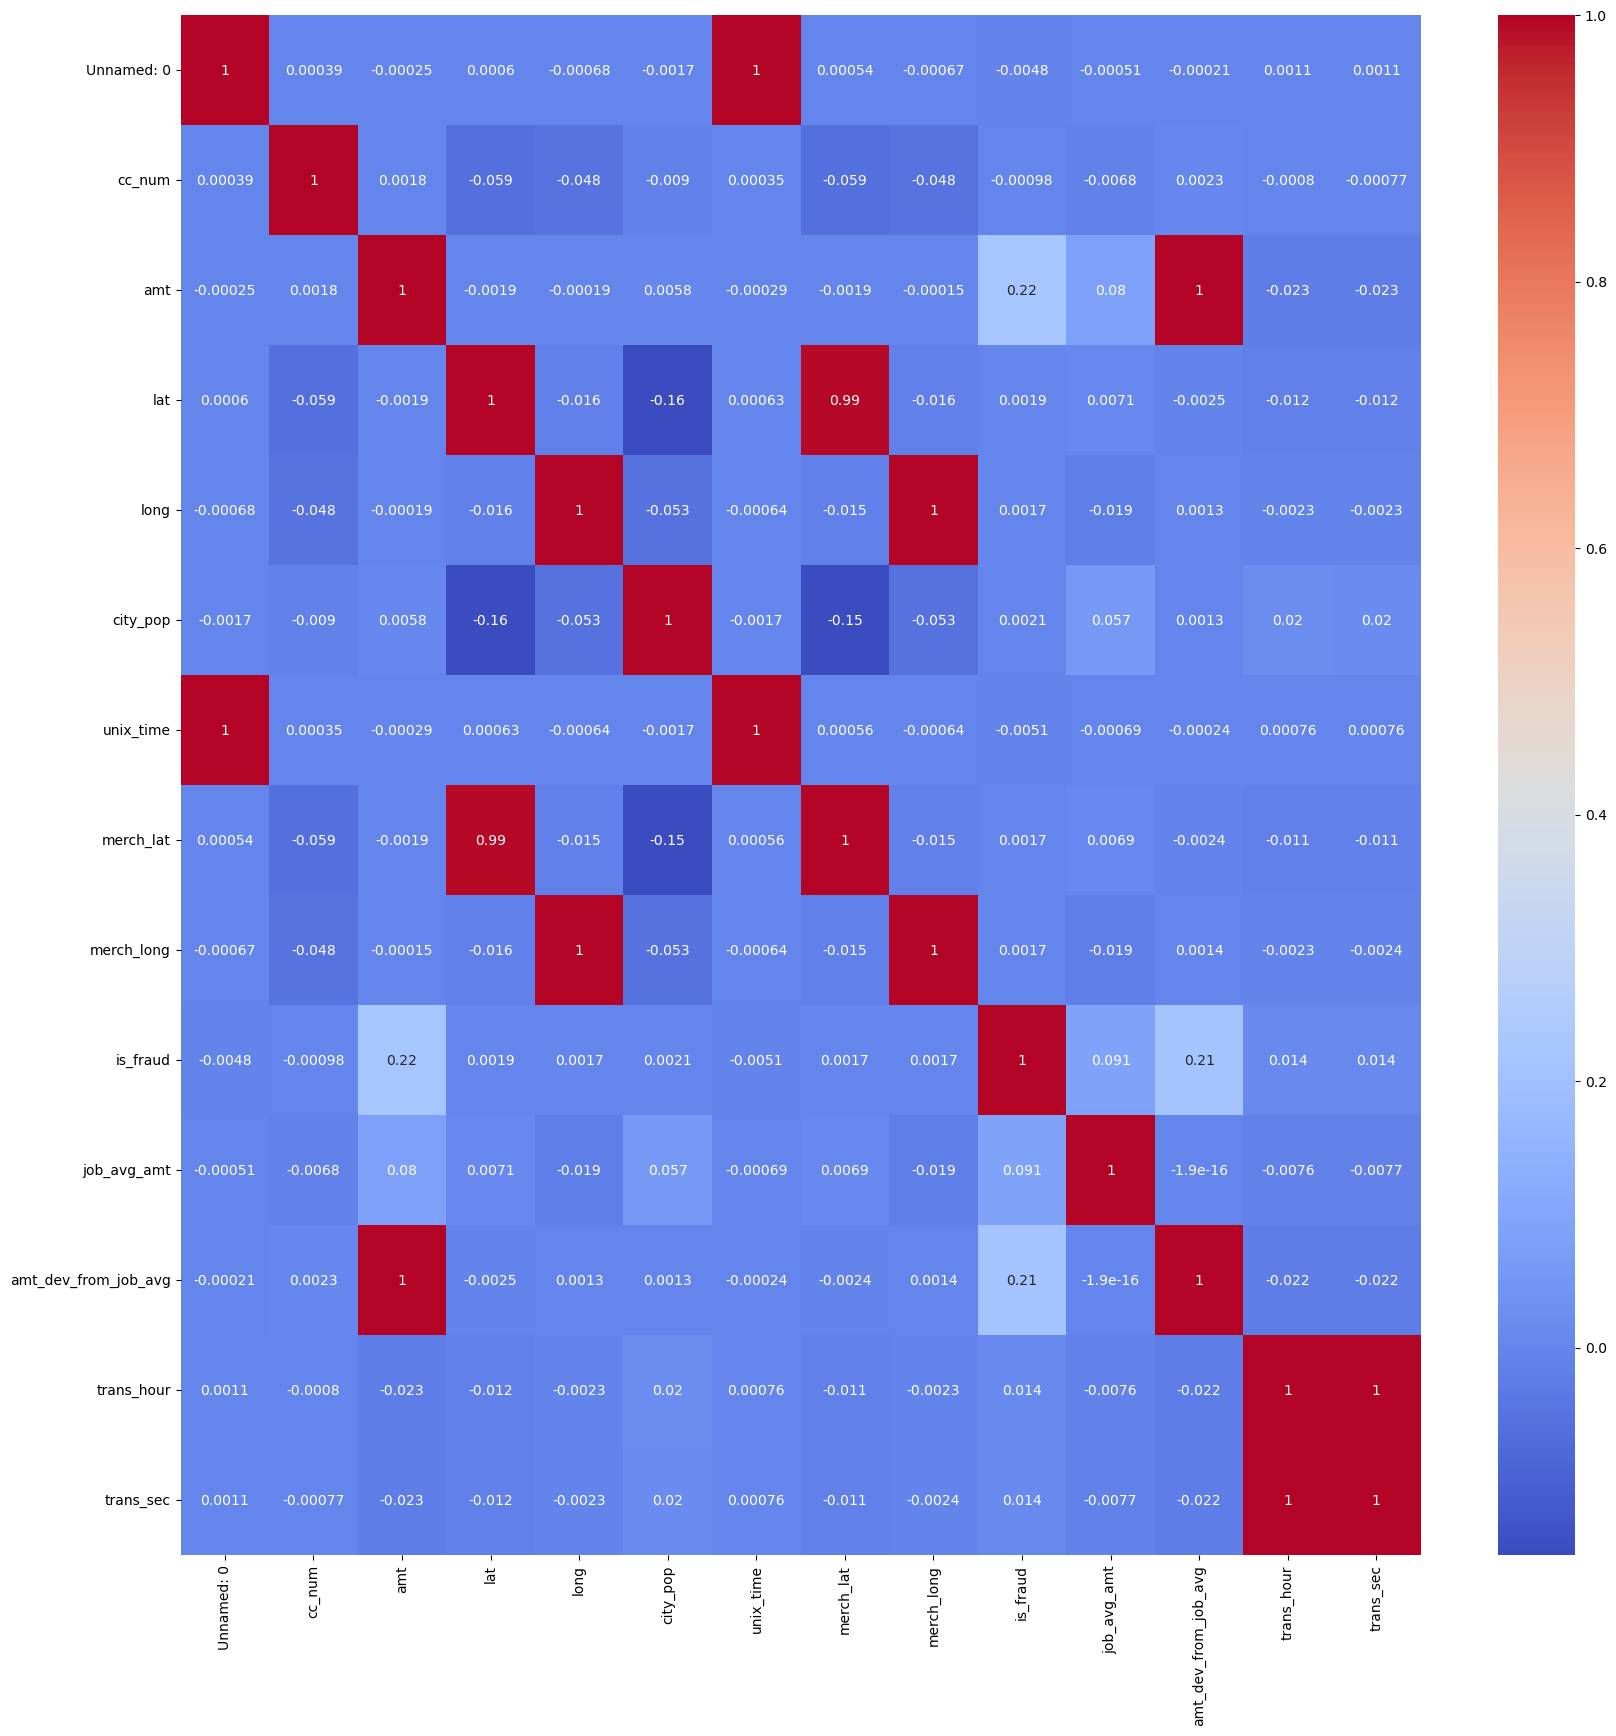

In [37]:
# Correlation check
# get the correaltion of each features in the dataset
corr = sample.corr(numeric_only=True) # have to make sure it only takes in numeric values
top_corr_features = corr.index
plt.figure(figsize=(20,20))

# plotting the heatmap

g = sns.heatmap(new_data[top_corr_features].corr(), annot=True, cmap= 'coolwarm')

<Axes: xlabel='is_fraud', ylabel='amt_dev_from_job_avg'>

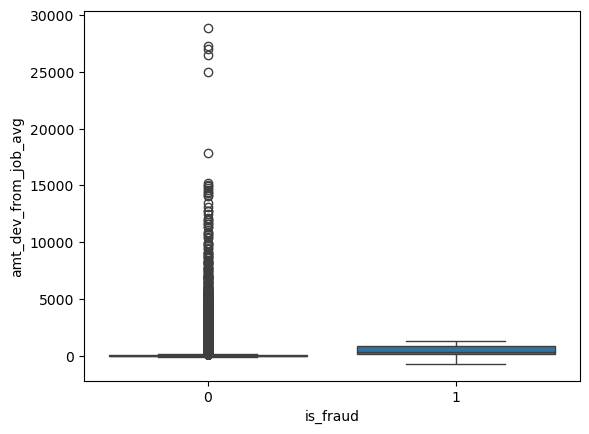

In [38]:
sns.boxplot(x='is_fraud', y="amt_dev_from_job_avg", data=new_data
        )

In [39]:
new_data['amt_zscore_from_amt'] = (new_data['amt']-new_data['job_avg_amt'])/new_data["amt_dev_from_job_avg"].replace(0,1)
# replacing 0 with 1 if the deviation is 0 to prevent any division by 0
# A high or low z-score would mean that the spending is unsual for certain jobs
# this might highlight a fraud but cannot be used by itself

In [40]:
# Group by transaction hour and calculate stats
hour_stats = new_data.groupby("trans_hour")["amt"].agg(["mean", "std"]).rename(columns={"mean": "hour_avg_amt", "std": "hour_std_amt"})

# Join back to main data
new_data = new_data.join(hour_stats, on="trans_hour")

# Calculate Z-score for amount at that hour
new_data["amt_zscore_from_hour"] = (new_data["amt"] - new_data["hour_avg_amt"]) / new_data["hour_std_amt"].replace(0, 1)

In [41]:
hour_stats = new_data.groupby("trans_hour")["amt"].agg(["mean", "std"]).reset_index()
hour_stats.to_csv("hour_stats.csv", index=False)

In [42]:
# Group by city or city_pop (if continuous, consider binning)
city_stats = new_data.groupby("city_pop")["amt"].agg(["mean", "std"]).rename(columns={"mean": "pop_avg_amt", "std": "pop_std_amt"})

# Join and calculate
new_data = new_data.join(city_stats, on="city_pop")
new_data["amt_zscore_from_pop"] = (new_data["amt"] - new_data["pop_avg_amt"]) / new_data["pop_std_amt"].replace(0, 1)

In [43]:
pop_stats = new_data.groupby("city_pop")["amt"].agg(["mean", "std"]).reset_index()
pop_stats.to_csv("pop_stats.csv", index=False)

In [44]:
new_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'lat', 'long', 'city_pop', 'job', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'job_avg_amt', 'amt_dev_from_job_avg',
       'trans_date', 'trans_time', 'trans_hour', 'trans_sec',
       'amt_zscore_from_amt', 'hour_avg_amt', 'hour_std_amt',
       'amt_zscore_from_hour', 'pop_avg_amt', 'pop_std_amt',
       'amt_zscore_from_pop'],
      dtype='object')

In [45]:
#Question: If card was used for fraud, does that make it more suceptible to fraud

#Sorting the data by time
new_data = new_data.sort_values(by = ["cc_num", "trans_date_trans_time"])

#Create a column that tracks fraud for a specific data and time
new_data["prior_fraud_on_card"] = (new_data.groupby("cc_num", group_keys = False)["is_fraud"]
                                  .apply(lambda x:x.shift().cumsum().fillna(0)
                                  .astype(int)))

# Now create a binary flag: was there at least one fraud before?
new_data["was_card_previously_fraudulent"] = (new_data["prior_fraud_on_card"] > 0).astype(int)

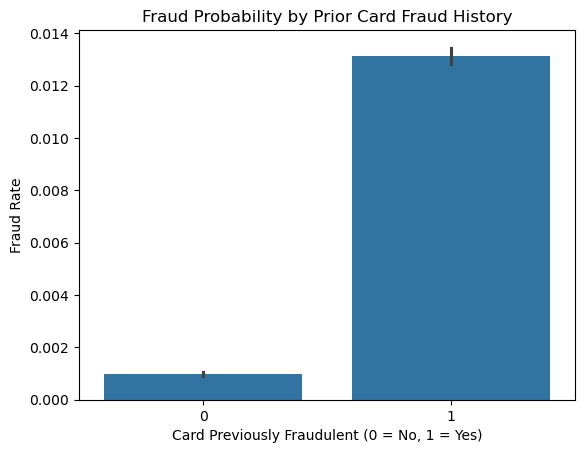

In [46]:
sns.barplot(
    data = new_data,
    x="was_card_previously_fraudulent",
    y="is_fraud"
)
plt.title("Fraud Probability by Prior Card Fraud History")
plt.ylabel("Fraud Rate")
plt.xlabel("Card Previously Fraudulent (0 = No, 1 = Yes)")
plt.show()


In [47]:
# getting the distance of user to merchant location, specifically for inperson places 
from geopy.distance import geodesic
def calc_distance(row):
    user_loc = (row['lat'], row['long'])
    merch_loc = (row['merch_lat'], row['merch_long'])
    # Check if any coordinate is missing
    if None in user_loc or None in merch_loc:
        return None
    try:
        return geodesic(user_loc, merch_loc).miles
    except:
        return None

new_data['distance_to_merchant'] = new_data.apply(calc_distance, axis=1)

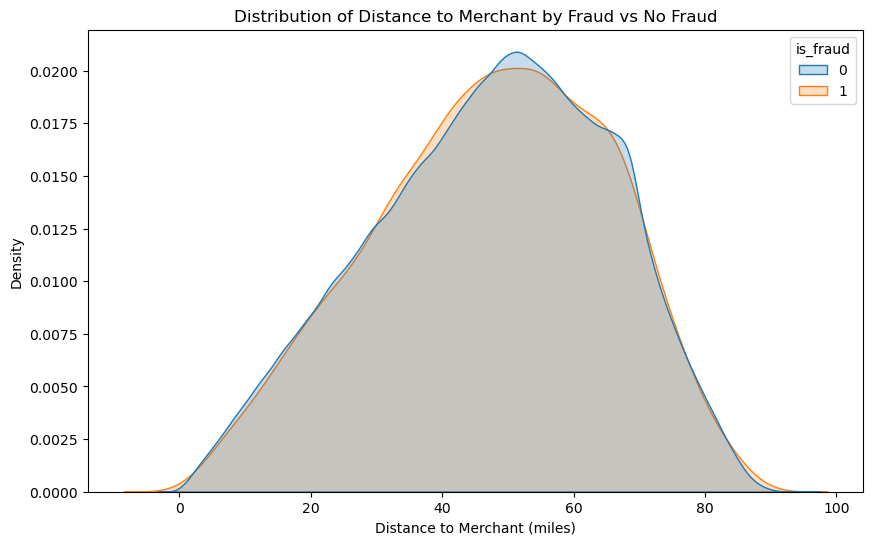

In [48]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=new_data, x='distance_to_merchant', hue='is_fraud', common_norm=False, fill=True)
plt.title("Distribution of Distance to Merchant by Fraud vs No Fraud")
plt.xlabel("Distance to Merchant (miles)")
plt.show()

In [49]:
print(new_data[['distance_to_merchant', 'is_fraud']].corr())

                      distance_to_merchant  is_fraud
distance_to_merchant              1.000000  0.000404
is_fraud                          0.000404  1.000000


## Checkpoint 2

In [50]:
class_data = new_data.copy() 
# copying this for my classical model

### Encoding my Data

In [51]:
encoder = LabelEncoder()
class_data["merchant"] = encoder.fit_transform(class_data["merchant"])
class_data["category"] = encoder.fit_transform(class_data["category"])
class_data["job"] = encoder.fit_transform(class_data["job"])

In [52]:
joblib.dump(encoder, "merchant_encoder.pkl")
joblib.dump(encoder, "category_encoder.pkl")
joblib.dump(encoder, "job_encoder.pkl")

['job_encoder.pkl']

In [53]:
class_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,lat,long,city_pop,job,...,amt_zscore_from_amt,hour_avg_amt,hour_std_amt,amt_zscore_from_hour,pop_avg_amt,pop_std_amt,amt_zscore_from_pop,prior_fraud_on_card,was_card_previously_fraudulent,distance_to_merchant
1017,1017,2019-01-01 12:47:15,60416207185,293,8,7.27,43.0048,-108.8964,1645,246,...,1.0,61.373212,143.965390,-0.375807,76.549212,106.912589,-0.647999,0,0,79.305168
2724,2724,2019-01-02 08:44:57,60416207185,43,2,52.94,43.0048,-108.8964,1645,246,...,1.0,76.131963,95.676970,-0.242399,76.549212,106.912589,-0.220827,0,0,68.476965
2726,2726,2019-01-02 08:47:36,60416207185,399,2,82.08,43.0048,-108.8964,1645,246,...,1.0,76.131963,95.676970,0.062168,76.549212,106.912589,0.051732,0,0,13.571882
2882,2882,2019-01-02 12:38:14,60416207185,126,7,34.79,43.0048,-108.8964,1645,246,...,1.0,61.373212,143.965390,-0.184650,76.549212,106.912589,-0.390592,0,0,54.136605
2907,2907,2019-01-02 13:10:46,60416207185,41,6,27.18,43.0048,-108.8964,1645,246,...,1.0,63.782815,195.683396,-0.187051,76.549212,106.912589,-0.461772,0,0,46.200735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294934,1294934,2020-06-20 21:04:59,4992346398065154184,44,10,60.47,41.1730,-89.2187,532,42,...,1.0,63.050888,167.634446,-0.015396,67.843832,157.223610,-0.046900,8,1,48.714074
1295369,1295369,2020-06-21 00:41:01,4992346398065154184,47,2,74.29,41.1730,-89.2187,532,42,...,1.0,79.149321,111.681627,-0.043510,67.843832,157.223610,0.041000,8,1,34.414588
1295587,1295587,2020-06-21 02:47:59,4992346398065154184,503,11,246.56,41.1730,-89.2187,532,42,...,1.0,80.045273,105.397530,1.579873,67.843832,157.223610,1.136701,8,1,71.824300
1296206,1296206,2020-06-21 08:04:28,4992346398065154184,287,12,2.62,41.1730,-89.2187,532,42,...,1.0,76.131963,95.676970,-0.768335,67.843832,157.223610,-0.414848,8,1,37.615794


## Feature Engineering / Train 

With feature engineering, new features/metrics are added to further understand the data set, it is one step after of the EDA

In [54]:
class_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'lat', 'long', 'city_pop', 'job', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'job_avg_amt', 'amt_dev_from_job_avg',
       'trans_date', 'trans_time', 'trans_hour', 'trans_sec',
       'amt_zscore_from_amt', 'hour_avg_amt', 'hour_std_amt',
       'amt_zscore_from_hour', 'pop_avg_amt', 'pop_std_amt',
       'amt_zscore_from_pop', 'prior_fraud_on_card',
       'was_card_previously_fraudulent', 'distance_to_merchant'],
      dtype='object')

In [55]:
numeric_columns_data = class_data.select_dtypes ( include = ["number"])

In [56]:
numeric_columns_data.corr()

,Unnamed: 0,cc_num,merchant,category,amt,lat,long,city_pop,job,unix_time,...,amt_zscore_from_amt,hour_avg_amt,hour_std_amt,amt_zscore_from_hour,pop_avg_amt,pop_std_amt,amt_zscore_from_pop,prior_fraud_on_card,was_card_previously_fraudulent,distance_to_merchant
Unnamed: 0,1.000000e+00,0.000386,-0.000972,0.000250,-0.000251,0.000602,-0.000676,-1.678021e-03,-7.800294e-07,0.998971,...,NaN,3.434595e-04,8.995406e-04,-1.495190e-04,-1.278068e-03,-1.838121e-03,-6.455037e-04,0.375202,0.411506,-6.688536e-04
cc_num,3.857663e-04,1.000000,0.000055,0.001230,0.001769,-0.059271,-0.048278,-8.991067e-03,2.916472e-02,0.000354,...,NaN,1.297689e-03,-1.094909e-03,2.027676e-03,1.535875e-02,-4.176862e-03,1.957643e-04,-0.056078,-0.044795,3.653781e-03
merchant,-9.718206e-04,0.000055,1.000000,0.032302,-0.002633,-0.002266,-0.000697,1.911008e-03,1.360387e-03,-0.000999,...,NaN,2.425875e-03,-1.968037e-03,-4.199487e-03,4.171168e-03,-2.387155e-04,-4.383797e-03,-0.000701,-0.000929,2.952109e-04
category,2.495622e-04,0.001230,0.032302,1.000000,0.030867,-0.008660,-0.000767,9.385850e-03,3.490427e-03,0.000182,...,NaN,-1.310764e-01,1.660097e-01,2.718068e-02,3.062546e-02,1.637681e-03,3.310762e-02,-0.000901,0.002046,1.979437e-03
amt,-2.511725e-04,0.001769,-0.002633,0.030867,1.000000,-0.001926,-0.000187,5.818284e-03,-6.277082e-04,-0.000293,...,NaN,4.632774e-02,-2.165491e-02,9.543567e-01,1.117198e-01,1.118334e-02,8.873482e-01,0.001508,0.018934,-1.086256e-03
lat,6.016648e-04,-0.059271,-0.002266,-0.008660,-0.001926,1.000000,-0.015533,-1.557296e-01,-2.759331e-02,0.000632,...,NaN,1.005398e-02,-1.204716e-02,-4.295881e-03,-1.576942e-02,-5.157796e-02,-2.612691e-04,0.022901,0.007327,-7.135691e-02
long,-6.762618e-04,-0.048278,-0.000697,-0.000767,-0.000187,-0.015533,1.000000,-5.271464e-02,-2.728926e-03,-0.000642,...,NaN,3.295750e-03,-1.358131e-03,-1.846767e-03,-1.186539e-02,2.966610e-02,1.623101e-03,0.038824,0.022517,4.040554e-03
city_pop,-1.678021e-03,-0.008991,0.001911,0.009386,0.005818,-0.155730,-0.052715,1.000000e+00,-5.494501e-02,-0.001714,...,NaN,-1.607256e-02,2.126326e-02,9.308659e-03,5.207927e-02,6.079011e-02,1.412294e-16,-0.038566,-0.019981,1.070534e-02
job,-7.800294e-07,0.029165,0.001360,0.003490,-0.000628,-0.027593,-0.002729,-5.494501e-02,1.000000e+00,0.000032,...,NaN,-1.122230e-02,1.292714e-02,1.087524e-03,-3.761797e-03,4.398614e-02,2.622928e-05,0.037809,0.019908,2.115781e-03
unix_time,9.989706e-01,0.000354,-0.000999,0.000182,-0.000293,0.000632,-0.000642,-1.714003e-03,3.242230e-05,1.000000,...,NaN,3.852236e-04,5.909699e-04,-2.195313e-04,-1.354636e-03,-1.854127e-03,-7.096872e-04,0.375549,0.411721,-6.361314e-04


In [57]:
class_data["trans_datetime"] = pd.to_datetime(class_data["trans_date"].astype(str) + " " + class_data["trans_time"].astype(str))

# Example features
class_data["dayofweek"] = class_data["trans_datetime"].dt.dayofweek
class_data["second"] = class_data["trans_datetime"].dt.second

# Then drop the original
class_data = class_data.drop(columns=["trans_date", "trans_time", "trans_datetime"])

In [58]:
X = class_data.drop(columns = ["is_fraud","trans_date_trans_time"], inplace = False)
Y = class_data["is_fraud"]

In [59]:
X.head()

,Unnamed: 0,cc_num,merchant,category,amt,lat,long,city_pop,job,unix_time,...,hour_std_amt,amt_zscore_from_hour,pop_avg_amt,pop_std_amt,amt_zscore_from_pop,prior_fraud_on_card,was_card_previously_fraudulent,distance_to_merchant,dayofweek,second
1017,1017,60416207185,293,8,7.27,43.0048,-108.8964,1645,246,1325422035,...,143.965390,-0.375807,76.549212,106.912589,-0.647999,0,0,79.305168,1,15
2724,2724,60416207185,43,2,52.94,43.0048,-108.8964,1645,246,1325493897,...,95.676970,-0.242399,76.549212,106.912589,-0.220827,0,0,68.476965,2,57
2726,2726,60416207185,399,2,82.08,43.0048,-108.8964,1645,246,1325494056,...,95.676970,0.062168,76.549212,106.912589,0.051732,0,0,13.571882,2,36
2882,2882,60416207185,126,7,34.79,43.0048,-108.8964,1645,246,1325507894,...,143.965390,-0.184650,76.549212,106.912589,-0.390592,0,0,54.136605,2,14
2907,2907,60416207185,41,6,27.18,43.0048,-108.8964,1645,246,1325509846,...,195.683396,-0.187051,76.549212,106.912589,-0.461772,0,0,46.200735,2,46


### Standard Vector Machine  

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

In [61]:
print(X_train.dtypes)

Unnamed: 0                          int64
cc_num                              int64
merchant                            int32
category                            int32
amt                               float64
lat                               float64
long                              float64
city_pop                            int64
job                                 int32
unix_time                           int64
merch_lat                         float64
merch_long                        float64
job_avg_amt                       float64
amt_dev_from_job_avg              float64
trans_hour                          int32
trans_sec                           int32
amt_zscore_from_amt               float64
hour_avg_amt                      float64
hour_std_amt                      float64
amt_zscore_from_hour              float64
pop_avg_amt                       float64
pop_std_amt                       float64
amt_zscore_from_pop               float64
prior_fraud_on_card               

In [62]:
#Scaling features required for SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_test)

In [63]:
# importing classes to help with evaluating our model
from sklearn.metrics import classification_report, confusion_matrix
model = SVC()
model.fit(X_train,Y_train)

SVC()

In [64]:
model.score(X_train,Y_train)

0.9942574276514933

In [65]:
Y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))


Accuracy: 0.9940270306746101


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257786
           1       0.00      0.00      0.00      1549

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Test SVM ML 

In [66]:
class_test = pd.read_csv('fraudTest.csv', sep=',')

In [67]:
# adjusting the data and time setting 
class_test["trans_date_trans_time"] = pd.to_datetime(class_test["trans_date_trans_time"])
class_test["dob"] = pd.to_datetime(class_test["dob"])
class_test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [68]:
# Because i wantwed to create a metiric job spending avage 
job_avg_amt = class_test.groupby('job')['amt'].mean()

class_test['job_avg_amt'] = class_test['job'].map(job_avg_amt)

# creating new columns thats hows the deviation from job spending average 
class_test['amt_dev_from_job_avg'] = class_test['amt'] - class_test['job_avg_amt']

In [69]:
# extracting the data and time separately
class_test['trans_date'] = class_test['trans_date_trans_time'].dt.date
class_test['trans_time'] = class_test['trans_date_trans_time'].dt.time
class_test['trans_hour'] = class_test['trans_date_trans_time'].dt.hour
class_test['trans_sec'] = class_test['trans_date_trans_time'].dt.hour * 3600 + \
                                  class_test['trans_date_trans_time'].dt.minute * 60 + \
                                  class_test['trans_date_trans_time'].dt.second


In [70]:
class_test['amt_zscore_from_amt'] = (class_test['amt']-class_test['job_avg_amt'])/class_test["amt_dev_from_job_avg"].replace(0,1)
# replacing 0 with 1 if the deviation is 0 to prevent any division by 0
# A high or low z-score would mean that the spending is unsual for certain jobs
# this might highlight a fraud but cannot be used by itself

In [71]:
# Group by transaction hour and calculate stats
hour_stats =class_test.groupby("trans_hour")["amt"].agg(["mean", "std"]).rename(columns={"mean": "hour_avg_amt", "std": "hour_std_amt"})

# Join back to main data
class_test = class_test.join(hour_stats, on="trans_hour")

# Calculate Z-score for amount at that hour
class_test["amt_zscore_from_hour"] = (class_test["amt"] - class_test["hour_avg_amt"]) / class_test["hour_std_amt"].replace(0, 1)

In [72]:
# Group by city or city_pop (if continuous, consider binning)
city_stats = class_test.groupby("city_pop")["amt"].agg(["mean", "std"]).rename(columns={"mean": "pop_avg_amt", "std": "pop_std_amt"})

# Join and calculate
class_test = class_test.join(city_stats, on="city_pop")
class_test["amt_zscore_from_pop"] = (class_test["amt"] - class_test["pop_avg_amt"]) / class_test["pop_std_amt"].replace(0, 1)

In [73]:
#Question: If card was used for fraud, does that make it more suceptible to fraud

#Sorting the data by time
class_test = class_test.sort_values(by = ["cc_num", "trans_date_trans_time"])

#Create a column that tracks fraud for a specific data and time
class_test["prior_fraud_on_card"] = (class_test.groupby("cc_num", group_keys = False)["is_fraud"]
                                  .apply(lambda x:x.shift().cumsum().fillna(0)
                                  .astype(int)))

# Now create a binary flag: was there at least one fraud before?
class_test["was_card_previously_fraudulent"] = (class_test["prior_fraud_on_card"] > 0).astype(int)

In [74]:
# getting the distance of user to merchant location, specifically for inperson places 
from geopy.distance import geodesic
def calc_distance(row):
    user_loc = (row['lat'], row['long'])
    merch_loc = (row['merch_lat'], row['merch_long'])
    # Check if any coordinate is missing
    if None in user_loc or None in merch_loc:
        return None
    try:
        return geodesic(user_loc, merch_loc).miles
    except:
        return None

class_test['distance_to_merchant'] = class_test.apply(calc_distance, axis=1)

In [75]:
class_test["trans_datetime"] = pd.to_datetime(class_test["trans_date"].astype(str) + " " + class_test["trans_time"].astype(str))

# Example features
class_test["dayofweek"] = class_test["trans_datetime"].dt.dayofweek
class_test["second"] = class_test["trans_datetime"].dt.second

# Then drop the original
class_test = class_test.drop(columns=["trans_date", "trans_time", "trans_datetime"])

In [76]:
class_test.drop(columns=['first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time', 'gender'],inplace=True)
class_test

,Unnamed: 0,cc_num,merchant,category,amt,lat,long,city_pop,job,unix_time,...,hour_std_amt,amt_zscore_from_hour,pop_avg_amt,pop_std_amt,amt_zscore_from_pop,prior_fraud_on_card,was_card_previously_fraudulent,distance_to_merchant,dayofweek,second
157,157,60416207185,fraud_Kutch-Ferry,home,124.66,43.0048,-108.8964,1645,Information systems manager,1371819942,...,157.587401,0.395945,81.952599,135.324849,0.315592,0,0,18.972710,6,42
741,741,60416207185,fraud_Halvorson Group,misc_pos,78.52,43.0048,-108.8964,1645,Information systems manager,1371831936,...,136.201033,0.118679,81.952599,135.324849,-0.025366,0,0,57.081778,6,36
3047,3047,60416207185,fraud_Conroy-Cruickshank,gas_transport,65.25,43.0048,-108.8964,1645,Information systems manager,1371887913,...,97.342573,-0.112404,81.952599,135.324849,-0.123426,0,0,75.731437,0,33
4351,4351,60416207185,fraud_Larkin Ltd,kids_pets,87.74,43.0048,-108.8964,1645,Information systems manager,1371915151,...,206.974745,0.119877,81.952599,135.324849,0.042767,0,0,40.633383,0,31
7695,7695,60416207185,fraud_Leffler-Goldner,personal_care,148.02,43.0048,-108.8964,1645,Information systems manager,1371990534,...,205.531061,0.404384,81.952599,135.324849,0.488213,0,0,23.857410,1,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552584,552584,4992346398065154184,fraud_Parisian and Sons,gas_transport,66.11,41.1730,-89.2187,532,Audiological scientist,1388455810,...,107.070476,-0.123235,63.144959,91.217507,0.032505,0,0,27.918527,3,10
552892,552892,4992346398065154184,fraud_Bogisich-Homenick,misc_net,4.58,41.1730,-89.2187,532,Audiological scientist,1388466815,...,105.606554,-0.674402,63.144959,91.217507,-0.642036,0,0,50.658764,3,35
553559,553559,4992346398065154184,fraud_Erdman-Kertzmann,gas_transport,95.96,41.1730,-89.2187,532,Audiological scientist,1388488544,...,96.681836,0.203905,63.144959,91.217507,0.359745,0,0,22.380408,3,44
553560,553560,4992346398065154184,fraud_Stracke-Lemke,grocery_pos,149.48,41.1730,-89.2187,532,Audiological scientist,1388488645,...,96.681836,0.757474,63.144959,91.217507,0.946474,0,0,50.915492,3,25


In [77]:
encoder = LabelEncoder()
class_test["merchant"] = encoder.fit_transform(class_test["merchant"])
class_test["category"] = encoder.fit_transform(class_test["category"])
class_test["job"] = encoder.fit_transform(class_test["job"])

In [78]:
X_class_test = class_test.drop(columns=["is_fraud"], inplace = False)
Y_class_test = class_test["is_fraud"]

In [79]:
y_class_pred = model.predict(X_class_test)
y_class_pred


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
svm_accuracy = accuracy_score(class_test['is_fraud'],y_class_pred)
svm_accuracy

0.9961401355721147

In [81]:
print("True labels:", np.bincount(Y_class_test))
print("Predicted labels:", np.bincount(y_class_pred))

True labels: [553574   2145]
Predicted labels: [555719]


In [82]:
from sklearn.metrics import classification_report

print(classification_report(Y_class_test, y_class_pred, zero_division=0))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



## Random Forest  

Random Forest is a powerful machine learning algorithm that works by building a collection of decision trees and combining their outputs to improve prediction accuracy and reduce overfitting. Each tree is trained on a random subset of the data and uses a random subset of features when splitting nodes, which introduces diversity and makes the overall model more robust. For classification tasks, the final prediction is based on a majority vote across all trees, while for regression, it’s the average of their outputs. Random Forest is widely used because it's easy to use, handles missing or noisy data well, and provides insights into feature importance.

It is a powerful tool used especially when we have a non linear relationship with our dependent variable (Fraud) - if helps to see non linear patterns. The depth of the decision tree correlates with how deep, the model will go in terms of understanding the data. We want it to fully understand the data but we dont want it to overfit - become generalized - becauase then it is not usefull.

The best kind of metrics for evaluating such model include F1 scores, Precision and recall, Confusion matrix and Classification report

In [83]:
# since i am using the same dataset I just make a copy of the classification data set
rand_data = class_data.copy()

In [84]:
rand_data.columns 

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'lat', 'long', 'city_pop', 'job', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'job_avg_amt', 'amt_dev_from_job_avg',
       'trans_hour', 'trans_sec', 'amt_zscore_from_amt', 'hour_avg_amt',
       'hour_std_amt', 'amt_zscore_from_hour', 'pop_avg_amt', 'pop_std_amt',
       'amt_zscore_from_pop', 'prior_fraud_on_card',
       'was_card_previously_fraudulent', 'distance_to_merchant', 'dayofweek',
       'second'],
      dtype='object')

In [85]:
X_rand = rand_data.drop(columns = ["is_fraud","trans_date_trans_time"], inplace = False)
Y_rand = rand_data['is_fraud']

In [86]:
print(X.columns.to_list())

['Unnamed: 0', 'cc_num', 'merchant', 'category', 'amt', 'lat', 'long', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long', 'job_avg_amt', 'amt_dev_from_job_avg', 'trans_hour', 'trans_sec', 'amt_zscore_from_amt', 'hour_avg_amt', 'hour_std_amt', 'amt_zscore_from_hour', 'pop_avg_amt', 'pop_std_amt', 'amt_zscore_from_pop', 'prior_fraud_on_card', 'was_card_previously_fraudulent', 'distance_to_merchant', 'dayofweek', 'second']


In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X_rand, Y_rand, test_size = 0.2, random_state = 42)

In [88]:
X_train.shape

(1037340, 28)

In [89]:
X_test.shape

(259335, 28)

In [90]:
# scaling the feature 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [91]:
# Class distribution of the training data set
print(pd.Series(Y_train).value_counts(normalize = True))

is_fraud
0    0.994257
1    0.005743
Name: proportion, dtype: float64


In [162]:
# I will add SMOTE because random forset on its own didnt help  much
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, Y_resampled = sm.fit_resample(X_train_scaled, Y_train)

# Convert resampled data to DataFrame with original column names
X_resampled = pd.DataFrame(X_resampled, columns=X_train.columns)

# Train mode
rf_model = RandomForestClassifier(
    n_estimators = 100, # number of trees in forest
    max_depth = 10, # Maximum depth of each tree (prevents overfitting)
    min_samples_split = 5, # Minimum number of samples required to split an internal node
    random_state = 42,  # For reproducibility
    class_weight = 'balanced'
)

In [163]:
print(Y_resampled.value_counts())


is_fraud
0    1031383
1    1031383
Name: count, dtype: int64


In [164]:
# 5 fold cross validation 
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, X_resampled, Y_resampled, cv=5, scoring = 'f1')
print("Cross-validation F1 scores:", cv_scores)
print("Average F1 score:", np.mean(cv_scores))

Cross-validation F1 scores: [0.98257118 0.98337354 0.9833339  0.98305957 0.98334946]
Average F1 score: 0.9831375327698769


In [165]:
rf_model.fit(X_resampled, Y_resampled) # we are trainign on the entire data set

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, random_state=42)

In [166]:
y_proba = rf_model.predict_proba(X_test)[:, 1]

In [167]:
y_pred =  rf_model.predict(X_test)

## Confusion matrix 

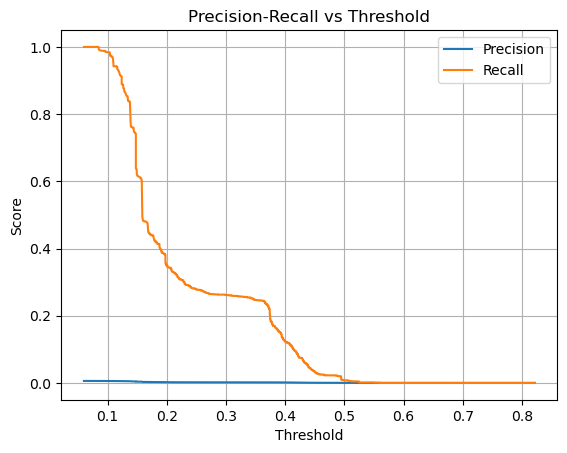

In [168]:
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities
y_scores = rf_model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(Y_test, y_scores)

# Example: Choose threshold with better recall (e.g., where recall > 0.8)
import matplotlib.pyplot as plt

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision-Recall vs Threshold')
plt.grid()
plt.show()

In [169]:
# FOr presicion - almost no false positives
# for recall - almost no false negagtives
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.80      0.88    257786
           1       0.00      0.01      0.00      1549

    accuracy                           0.79    259335
   macro avg       0.50      0.40      0.44    259335
weighted avg       0.99      0.79      0.88    259335



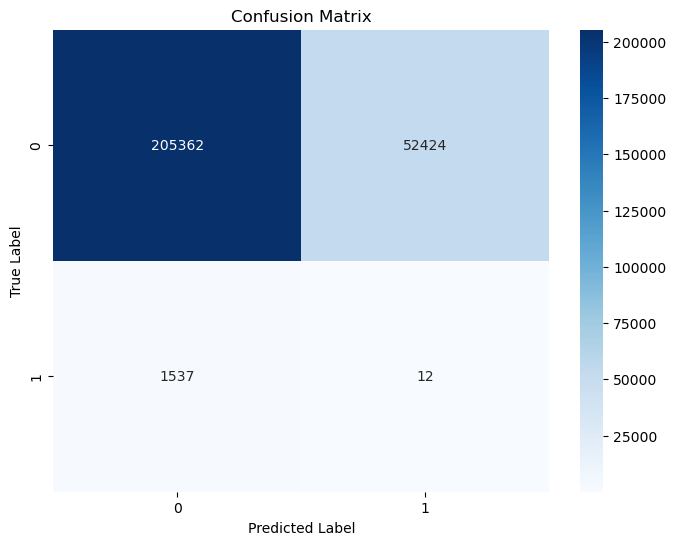

In [170]:
# plot got our confusion matrix
plt.figure(figsize=(8,6))
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Feature importance

In [171]:
# Feature importance
importance = rf_model.feature_importances_
feature_imp = pd.DataFrame({ #creating a dictionary
    'Feature': X.columns, # feature is key, X.columns is value
    'Importance': importance
}).sort_values('Importance', ascending=False)

In [172]:
feature_imp.head()

,Feature,Importance
4,amt,0.155383
19,amt_zscore_from_hour,0.154108
13,amt_dev_from_job_avg,0.151699
23,prior_fraud_on_card,0.120404
17,hour_avg_amt,0.103383


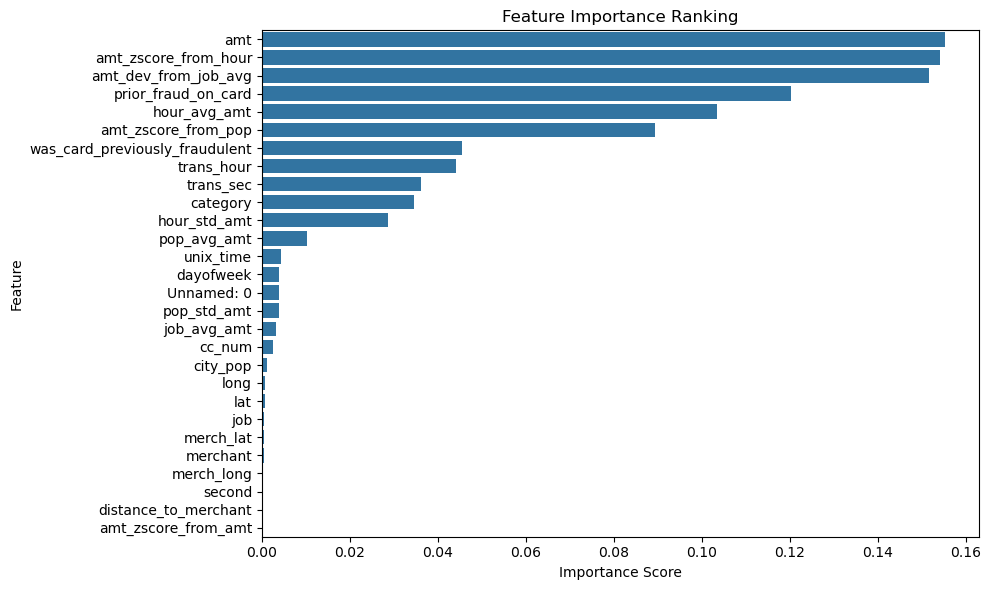

In [173]:
# Plotting the improtace of each feature when used in our prediction
plt.figure(figsize=(10,6))
sns.barplot(data=feature_imp, x='Importance', y='Feature')
plt.title("Feature Importance Ranking")
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

## Heatmap 

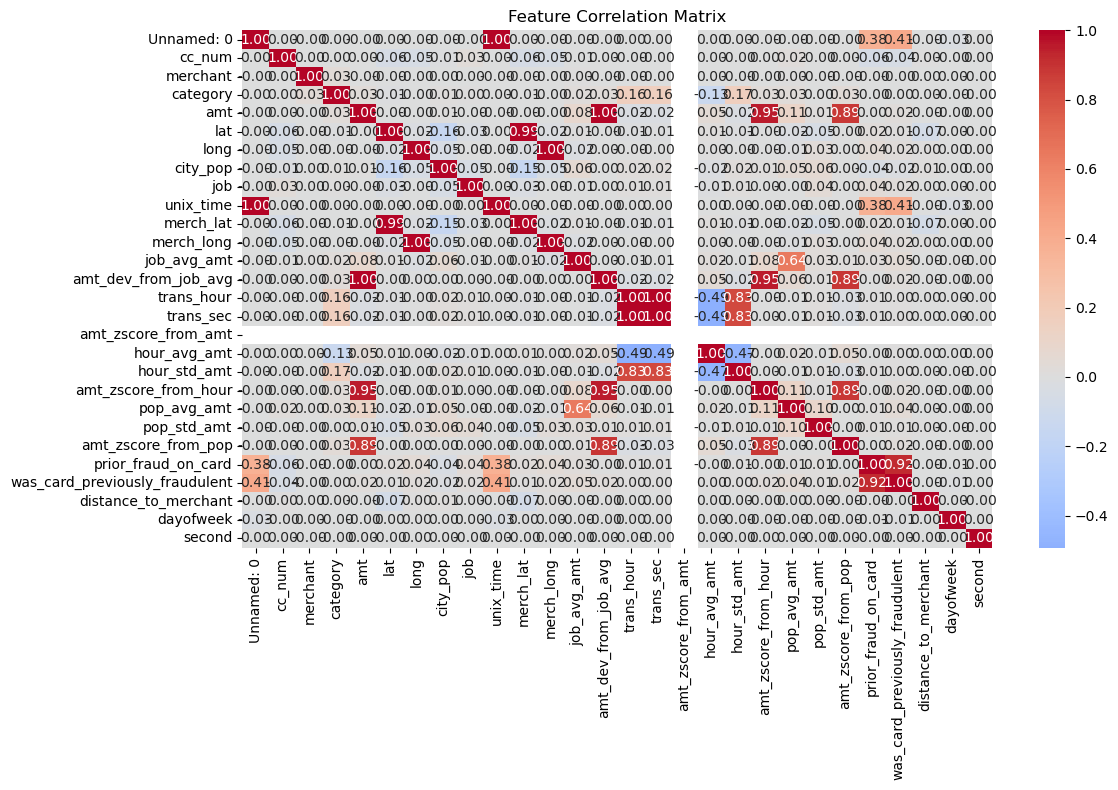

In [174]:
plt.figure(figsize=(12,8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=True, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# If you see a correlation of more than 0.8 that means we could improve 
# the model by removing on of the correlated feature and use the other.

## ROC AUC 

In [175]:
# this helps us figure the probability of the model predicting a true negative (1) when there is an actual fraud case 
y_pred_prob = rf_model.predict_proba(X_resampled)[:, 1] 
fpr, tpr, _ = roc_curve(Y_resampled, y_pred_prob)
roc_auc = auc(fpr, tpr)

In [176]:
print(roc_auc)

0.9988288183403065


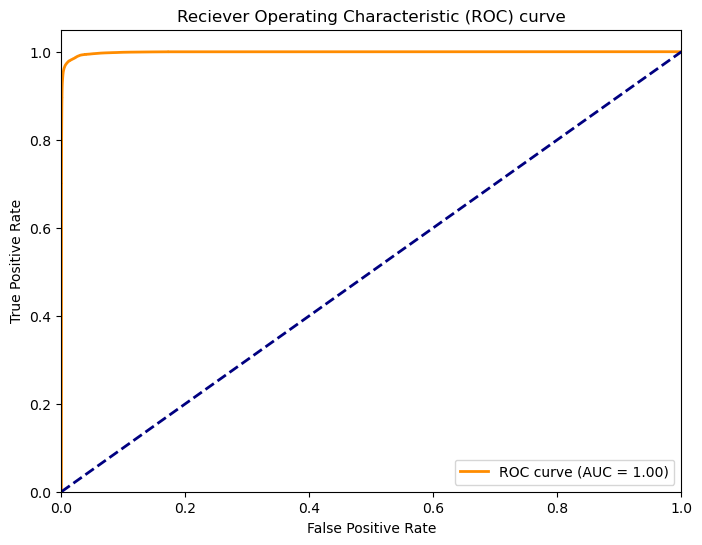

In [177]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic (ROC) curve')
plt.legend(loc = 'lower right')
plt.show()

In [178]:
y_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_proba)

# Find the threshold where TPR - FPR is highest
optimal_idx = (tpr - fpr).argmax()
optimal_threshold = thresholds[optimal_idx]

print("Optimal threshold:", optimal_threshold)

y_pred_op_rf = (y_proba >= optimal_threshold).astype(int)
print(classification_report(Y_test, y_pred_op_rf))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Optimal threshold: 0.32773587462522735
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    257786
           1       0.15      0.96      0.26      1549

    accuracy                           0.97    259335
   macro avg       0.58      0.97      0.62    259335
weighted avg       0.99      0.97      0.98    259335



## XGBoost

In [179]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    scale_pos_weight=(len(Y_train[Y_train==0]) / len(Y_train[Y_train==1])),
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)


In [180]:
xgb.fit(X_resampled, Y_resampled)
y_proba = xgb.predict_proba(X_test_scaled)[:, 1]

C:\Users\divin\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [15:55:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [181]:
fpr, tpr, thresholds = roc_curve(Y_test, y_proba)
optimal_idx = (tpr - fpr).argmax()
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold:", optimal_threshold)

y_pred_op_xg = (y_proba >= optimal_threshold).astype(int) # getting optimized prediction for xgboost
print(classification_report(Y_test, y_pred_op_xg))

Optimal threshold: 0.50749815
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    257786
           1       0.33      0.98      0.49      1549

    accuracy                           0.99    259335
   macro avg       0.66      0.98      0.74    259335
weighted avg       1.00      0.99      0.99    259335



## Deep Learning model with TensorFlow

Deep learning is a branch of machine learning that uses artificial neural networks with many layers (hence “deep”) to model and learn complex patterns in data. Inspired by the human brain, these networks consist of interconnected nodes (neurons) that process information in layers — from raw input (like images, text, or sound) to high-level predictions or decisions.

Deep learning shines in tasks like image recognition, natural language processing, speech recognition, and more, especially when large amounts of data are available. Popular architectures include Convolutional Neural Networks (CNNs) for images and Recurrent Neural Networks (RNNs) or Transformers for sequential data like text.

While powerful, deep learning models require significant computational resources, large datasets, and often longer training times compared to traditional models — but they typically offer superior performance on complex tasks.

With the deep learning model, it is still the same goal intended, it can also cover more ground and works best with large data - it better understands the nuances and slight changes in values 

In [22]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [117]:
tf_model = Sequential()
tf_model.add(Dense(units = 32, activation ="relu", input_dim = X_resampled.shape[1]))
tf_model.add(Dense(units = 64, activation="relu"))
tf_model.add(Dense(units = 1, activation = "sigmoid"))

C:\Users\divin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [118]:
tf_model.compile(loss='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])

In [119]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='loss',        # or 'val_accuracy'
    patience=5,                # waits 5 epochs for improvement
    restore_best_weights=True # reverts to best model
)

In [120]:
tf_model.fit(X_resampled, Y_resampled, epochs = 100, batch_size=32, callbacks = [early_stop]) 
# had to stop a little earlier because model was good and to prevent overfitting

Epoch 1/100
64462/64462 ━━━━━━━━━━━━━━━━━━━━ 98s 2ms/step - accuracy: 0.9465 - loss: 0.1369
Epoch 2/100
64462/64462 ━━━━━━━━━━━━━━━━━━━━ 96s 1ms/step - accuracy: 0.9795 - loss: 0.0557
Epoch 3/100
64462/64462 ━━━━━━━━━━━━━━━━━━━━ 97s 2ms/step - accuracy: 0.9842 - loss: 0.0445
Epoch 4/100
64462/64462 ━━━━━━━━━━━━━━━━━━━━ 98s 2ms/step - accuracy: 0.9865 - loss: 0.0389
Epoch 5/100
64462/64462 ━━━━━━━━━━━━━━━━━━━━ 97s 2ms/step - accuracy: 0.9878 - loss: 0.0353
Epoch 6/100
64462/64462 ━━━━━━━━━━━━━━━━━━━━ 98s 2ms/step - accuracy: 0.9891 - loss: 0.0323
Epoch 7/100
64462/64462 ━━━━━━━━━━━━━━━━━━━━ 100s 2ms/step - accuracy: 0.9898 - loss: 0.0303
Epoch 8/100
64462/64462 ━━━━━━━━━━━━━━━━━━━━ 98s 2ms/step - accuracy: 0.9906 - loss: 0.0281
Epoch 9/100
64462/64462 ━━━━━━━━━━━━━━━━━━━━ 99s 2ms/step - accuracy: 0.9910 - loss: 0.0270
Epoch 10/100
64462/64462 ━━━━━━━━━━━━━━━━━━━━ 100s 2ms/step - accuracy: 0.9918 - loss: 0.0253
Epoch 11/100
64462/64462 ━━━━━━━━━━━━━━━━━━━━ 99s 2ms/step - accuracy: 0.9920

KeyboardInterrupt: 

In [121]:
y_pred_tf = tf_model.predict(X_test)
y_pred_tf = [0 if val < 0.5 else 1 for val in y_pred_tf]

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 8s 960us/step


In [122]:
y_pred_tf

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [124]:
accuracy_score(Y_test, y_pred_tf)

0.9940270306746101

In [152]:
# picking threshold that will maximize our model by balancing sensitivity and specificty 
# fpr - false positive rates
#tpf - true positive rates
fpr, tpr, thresholds = roc_curve(Y_test, y_proba) 

In [153]:
optimal_idx = (tpr - fpr).argmax() # this computes the diffference between tpr and ftr and gets the max 
optimal_threshold = thresholds[optimal_idx] #  to select the threshold value at the index where the maximum difference (Youden’s J) was found.
# is the best threshold to separate positive and negative
print("Optimal threshold:", optimal_threshold)

Optimal threshold: 0.50749815


In [156]:
y_pred_op_tf = (y_proba >= optimal_threshold).astype(int)

In [158]:
print(confusion_matrix(Y_test, y_pred_op_tf))
print(classification_report(Y_test, y_pred_op_tf))

[[254713   3073]
 [    35   1514]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    257786
           1       0.33      0.98      0.49      1549

    accuracy                           0.99    259335
   macro avg       0.66      0.98      0.74    259335
weighted avg       1.00      0.99      0.99    259335



In [ ]:
tf_model.save("fraud_model.keras")